In [57]:
# utilities
import re
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
# Setup data set
#from google.colab import drive
#drive.mount("/content/gdrive")

## load tweets from Google drive
#DATASET_COLUMNS=['target','ids','date','flag','user','text']
#DATASET_ENCODING = "ISO-8859-1"
#df = pd.read_csv("/content/gdrive/My Drive/final_project_tweets.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

#df.sample(5)

In [59]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("final_project_tweets.csv",na_filter = False, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [60]:
#Get the size(length) of the data frame

print('length of data is', len(df))

length of data is 1600000


In [61]:
#check the lable for the dataset,0 = negative and 4 = positive
df['target'].unique()

array([0, 4], dtype=int64)

In [62]:
#sperate the positive and negative tweets 
pos = df[df['target'] == 4]
neg = df[df['target'] == 0]
neg

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [63]:
pos_cut = pos.iloc[:int(1*len(pos)/40)]
neg_cut = neg.iloc[:int(1*len(neg)/40)]
len(pos_cut),len(neg_cut)

(20000, 20000)

In [64]:
#split data set by 3/4 of it's length
training_pos_len = 3*len(pos_cut)/4
training_neg_len = 3*len(neg_cut)/4
training_pos_len,training_neg_len

(15000.0, 15000.0)

In [65]:
training_pos = pos_cut.iloc[:int(training_pos_len)]
training_neg = neg_cut.iloc[:int(training_neg_len)]


test_pos = pos_cut.iloc[int(training_pos_len):]
test_neg = neg_cut.iloc[int(training_neg_len):]

print('testing positive ' + str(len(test_pos)) + '\ntesting negative ' + str(len(test_neg)))
print('\ntraining positive ' + str(len(training_pos)) + '\ntraining negative ' + str(len(training_neg)))

testing positive 5000
testing negative 5000

training positive 15000
training negative 15000


In [66]:
#combine the positive and negative dataset into training and testing set.
train_set = pd.concat([training_pos, training_neg])
test_set = pd.concat([test_pos, test_neg])
#convert all text messages into lowercase for further use
train_set['text']=train_set['text'].str.lower()
test_set['text']=test_set['text'].str.lower()

In [67]:
#
#  Input : dataframe with a column names 'text' which contains raw tweets (one per row)
#  Output: A list of lists of tokens corrsponding to the 'text' column
#
# cleaning URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def tokenize_tweets2(tweets):
    """Given a df with tweets in 'text' col, this function return tokens as a list of lists"""
    tweets['text'] = tweets['text'].apply(lambda x: cleaning_URLs(x))
    # apply tokenize to the 'text' coolumn in the tweets df
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tweets['text'].apply(tweet_tokenizer.tokenize)
    
    # filter the stopwords, punctuation and miscs
    misc = ['rt', '’', '…', '—', 'u', '”', 'w', '“', '...', '️', 'http', 'https','#']
    to_remove = nltk.corpus.stopwords.words('english') + list(string.punctuation) + misc
    
    lemmatizer = WordNetLemmatizer()
    
    tokens = [[lemmatizer.lemmatize(token) for token in tw if token not in to_remove] for tw in tokens]      
    return(tokens)



In [68]:
train_tokens = tokenize_tweets2(train_set)
print(len(train_tokens))
train_tokens[:10]

30000


[['love', 'guy', 'r', 'best'],
 ['im',
  'meeting',
  'one',
  'besties',
  'tonight',
  'cant',
  'wait',
  'girl',
  'talk'],
 ['thanks',
  'twitter',
  'add',
  'sunisa',
  'got',
  'meet',
  'hin',
  'show',
  'dc',
  'area',
  'sweetheart'],
 ['sick',
  'really',
  'cheap',
  'hurt',
  'much',
  'eat',
  'real',
  'food',
  'plus',
  'friend',
  'make',
  'soup'],
 ['effect', 'everyone'],
 ['tell',
  'burst',
  'laughing',
  'really',
  'loud',
  'thanks',
  'making',
  'come',
  'sulk'],
 ['thans', 'response', 'ihad', 'already', 'find', 'answer'],
 ['jealous', 'hope', 'great', 'time', 'vega', 'like', "acm's", 'love', 'show'],
 ['ah', 'congrats', 'mr', 'fletcher', 'finally', 'joining', 'twitter'],
 ['responded', 'stupid', 'cat', 'helping', 'type', 'forgive', 'error']]

In [69]:
train_set['text'] = train_tokens


In [70]:
#tokenize the training set
test_tokens = tokenize_tweets2(test_set)
print(len(test_tokens))
test_tokens[:10]

10000


[['en', 'alternate'],
 ['hehehe',
  'conversation',
  'pointing',
  'fact',
  'men',
  'simple',
  'being',
  'simpleton'],
 ['sigh', 'wit', 'wasted', 'time'],
 ['watching', 'supernatural', 'season', '4', 'dvd', 'marathon'],
 ['even', '8am', "i'm", 'love', 'saturday', 'morning'],
 ['ok',
  '..',
  'organaut',
  'sound',
  'great',
  'great',
  'presets',
  'vst',
  'parameter',
  'engine',
  'bit',
  'flacky',
  ':/',
  'guess',
  "i'll",
  'mention',
  'vh',
  '1',
  'instead'],
 ['take',
  'looong',
  'shower',
  'kind',
  'body',
  'care',
  'getting',
  'ready',
  'long',
  'night',
  'oh',
  'updated'],
 ['80', 'degree', 'today', 'perfect', 'wine', 'festival'],
 ['well', 'blame'],
 ['yes', 'thank', 'sharing', 'wonderful', 'thing', 'vibe']]

In [71]:
#tokenize the test set
test_set['text'] = test_tokens


In [72]:
#performance check 
def getPerformance(label,predict):

    true_p = 0
    false_p = 0
    true_n = 0
    false_n = 0
    true_predict = 0
    false_predict = 0
    for i in range(len(label)):
        if label[i] == predict[i] == 1:
            true_p += 1
            true_predict += 1
        if label[i] == predict[i] == 0:
            true_n += 1
            true_predict += 1
        if label[i] < predict[i]:
            false_p += 1
            false_predict += 1
        if label[i] > predict[i]:
            false_n += 1
            false_predict += 1
     

    accuracy =  true_predict/(true_predict + false_predict)
    recall = true_p/(true_p + false_n)
    precision = true_p/(true_p + false_p)
    print("Accuracy: "+ str(accuracy)+" Recall: "+str(recall)+" Precision: "+str(precision))

In [73]:
#Find all the unique words in text column of training set to create bag of words representation
train_unique = []
for tokens in train_set['text']:
    for word in tokens:
        if word not in train_unique:
              train_unique.append(word)
len(train_unique)

25535

In [74]:
#Extracting features and storing them into trainning feature matrix
train_matrix = []
for tokens in train_set['text']:
    train_featurevec = []
    for w in train_unique:
        train_featurevec.append(tokens.count(w))
    train_matrix.append(train_featurevec)


In [75]:
len(train_matrix),len(train_matrix[0])

(30000, 25535)

In [76]:
#Extracting features and storing them into trainning feature matrix
test_matrix = []
for tokens in test_set['text']:
    test_featurevec = []
    for w in train_unique:
        test_featurevec.append(tokens.count(w))
    test_matrix.append(test_featurevec)
len(test_matrix),len(test_matrix[0])

(10000, 25535)

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
acc_list = []
rec_list = []
prec_list = []
f1_list = []
k_ls = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 75, 100] 
k_choices=[1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 75, 100]

In [79]:
def CrossValidation(num_folds, Xtr, Ytr, k_choices):  
  
   

    X_train_folds = []
    Y_train_folds = []


    X_train_folds=np.array_split(Xtr,num_folds)
    Y_train_folds=np.array_split(Ytr,num_folds)



    k_to_accuracies = {}


    for val in k_choices:
        k_to_accuracies[val]=[]
        for i in range(num_folds):
            X_vali = X_train_folds[i]
            #print('X_vali_%d'%i)
            #print(X_vali)
            Y_vali = Y_train_folds[i]
            X_train = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
            #print('X_train_%d'%i)
            #print(X_train)
            Y_train = np.concatenate(Y_train_folds[:i]+Y_train_folds[i+1:])
            classifier = KNeighborsClassifier(n_neighbors=val,algorithm='brute') #Using brute-force algorithm for quicker computation.
            classifier.fit(X_train, Y_train) #Fitting the built-in sklearn classifier on our training data
            predicted_label = classifier.predict(X_vali) #Making the classifier to predict on the previously unseen test data.
            
            accuracy_score = (metrics.accuracy_score(Y_vali,predicted_label))
            accuracy_score = (round(accuracy_score,2))*100          
            k_to_accuracies[val].append(accuracy_score)

    


    # Print out the computed accuracies
    for k in sorted(k_to_accuracies):
        for accuracy in k_to_accuracies[k]:
            print('k = %d, accuracy = %f' % (k, accuracy))
    return k_to_accuracies

In [80]:
accuracy_ls = CrossValidation(5,train_matrix, train_set['target'].values,k_choices)

k = 1, accuracy = 81.000000
k = 1, accuracy = 78.000000
k = 1, accuracy = 58.000000
k = 1, accuracy = 23.000000
k = 1, accuracy = 21.000000
k = 3, accuracy = 83.000000
k = 3, accuracy = 81.000000
k = 3, accuracy = 58.000000
k = 3, accuracy = 20.000000
k = 3, accuracy = 18.000000
k = 5, accuracy = 48.000000
k = 5, accuracy = 52.000000
k = 5, accuracy = 63.000000
k = 5, accuracy = 39.000000
k = 5, accuracy = 36.000000
k = 7, accuracy = 46.000000
k = 7, accuracy = 52.000000
k = 7, accuracy = 63.000000
k = 7, accuracy = 34.000000
k = 7, accuracy = 32.000000
k = 9, accuracy = 44.000000
k = 9, accuracy = 51.000000
k = 9, accuracy = 62.000000
k = 9, accuracy = 31.000000
k = 9, accuracy = 29.000000
k = 11, accuracy = 42.000000
k = 11, accuracy = 51.000000
k = 11, accuracy = 62.000000
k = 11, accuracy = 27.000000
k = 11, accuracy = 27.000000
k = 13, accuracy = 42.000000
k = 13, accuracy = 51.000000
k = 13, accuracy = 62.000000
k = 13, accuracy = 26.000000
k = 13, accuracy = 25.000000
k = 15, ac

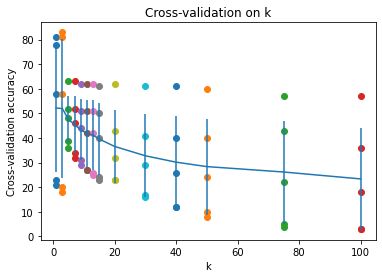

In [81]:
%matplotlib inline
# plot the raw observations
for k in k_choices:
    accuracies = accuracy_ls[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_ls.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_ls.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [82]:
best_k = k_choices[accuracies_mean.argmax()]
print('The best hyperparameter value is %d.' %best_k )

The best hyperparameter value is 1.


In [83]:
def KNNClassifying_Performance(trainfeatures,testfeatures,best_k):

    X_train = trainfeatures #train_matrix - 2D feature vector
    X_test = testfeatures #test_matrix - 2D feature vector
    y_train = train_set['target'].values #trained sentiment label
    y_test = test_set['target'].values #test sentiment label

    k = best_k

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)

    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)

In [84]:
%%time
KNNClassifying_Performance(train_matrix,test_matrix,best_k)



Confusion Matrix for k = 1 is:

[[1508 3492]
 [ 607 4393]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

           0       0.71      0.30      0.42      5000
           4       0.56      0.88      0.68      5000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.55     10000
weighted avg       0.64      0.59      0.55     10000

CPU times: total: 8min 6s
Wall time: 2min 22s
